<a href="https://colab.research.google.com/github/marciodbotas/MachineLearning/blob/main/2_4_11_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [ ]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# Do not change this code
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:00<00:00, 158MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 149MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 112MB/s] 


In [ ]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255
)

validation_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' # YOUR CODE HERE #
VAL_DIRECTORY_LOCATION = '/tmp/validation' # YOUR CODE HERE #
TARGET_SIZE = (224, 224) # YOUR CODE HERE #
CLASS_MODE = 'categorical' # YOUR CODE HERE #

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data.

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    #YOUR CODE HERE#
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,395,395 (73.99 MB)

 Trainable params: 19,395,395 (73.99 MB)

 Non-trainable params: 0 (0.00 B)

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [ ]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'Adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3131 - loss: 1.2770 - val_accuracy: 0.3308 - val_loss: 1.0984
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step - accuracy: 0.3278 - loss: 1.0994 - val_accuracy: 0.3308 - val_loss: 1.0754
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 572ms/step - accuracy: 0.3529 - loss: 1.0635 - val_accuracy: 0.5714 - val_loss: 0.9559
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.5636 - loss: 0.9307 - val_accuracy: 0.5865 - val_loss: 0.8453
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 555ms/step - accuracy: 0.6142 - loss: 0.8517 - val_accuracy: 0.5865 - val_loss: 0.8301
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 633ms/step - accuracy: 0.6200 - loss: 0.7814 - val_accuracy: 0.5865 - val_loss: 0.7766
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 569ms/step - accuracy: 0.6048 - loss: 0.8035 - val_accuracy: 0.6767 - val_loss: 0.7588
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - accuracy: 0.6961 - loss: 0.7053 - val_accuracy: 0.6917 - val_loss: 

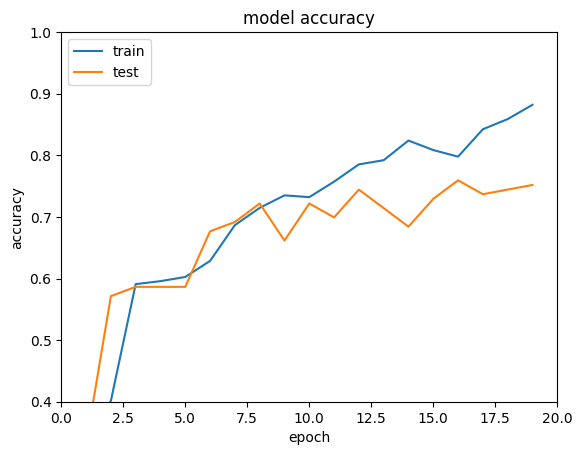

In [ ]:
NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

In [ ]:
import tensorflow as tf

# Defina o otimizador com uma taxa de aprendizado menor
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Sugestão: taxa de aprendizado menor

model = tf.keras.models.Sequential([
    # Camadas convolucionais
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # Camadas densas com Dropout para regularização
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Sugestão: Dropout após camada densa
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Sugestão: Dropout após camada densa
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile o modelo usando o otimizador com taxa de aprendizado reduzida
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para reduzir a learning rate automaticamente se necessário
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Sugestão: callback para ajuste dinâmico da learning rate

# Exibe o resumo do modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,395,395 (73.99 MB)

 Trainable params: 19,395,395 (73.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'Adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 984ms/step - accuracy: 0.3258 - loss: 1.2820 - val_accuracy: 0.3308 - val_loss: 1.0764
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.3926 - loss: 1.0785 - val_accuracy: 0.5113 - val_loss: 0.9838
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step - accuracy: 0.5029 - loss: 0.9777 - val_accuracy: 0.6466 - val_loss: 0.8317
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.6007 - loss: 0.8739 - val_accuracy: 0.6241 - val_loss: 0.7888
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 715ms/step - accuracy: 0.6417 - loss: 0.8055 - val_accuracy: 0.5489 - val_loss: 0.8727
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.6128 - loss: 0.8379 - val_accuracy: 0.6692 - val_loss: 0.7190
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 771ms/step - accuracy: 0.6143 - loss: 0.8697 - val_accuracy: 0.6391 - val_loss: 0.7567
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 555ms/step - accuracy: 0.6504 - loss: 0.8033 - val_accuracy: 0.6692 - val_loss

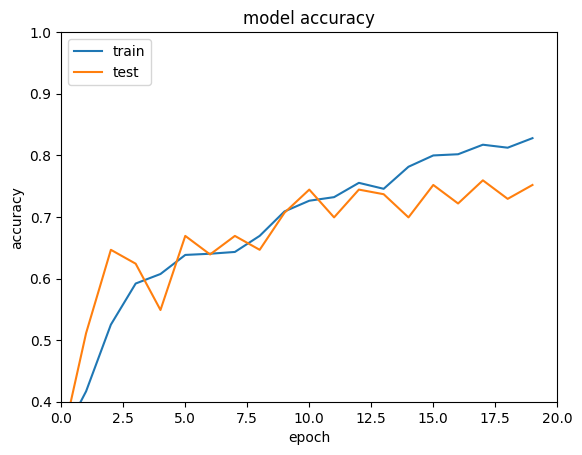

In [ ]:
NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,395,395 (73.99 MB)

 Trainable params: 19,395,395 (73.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2881 - loss: 1.3396 - val_accuracy: 0.4887 - val_loss: 1.0900
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4080 - loss: 1.0841 - val_accuracy: 0.5338 - val_loss: 0.9979
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4807 - loss: 1.0264 - val_accuracy: 0.5714 - val_loss: 0.8958
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5227 - loss: 0.9743 - val_accuracy: 0.4511 - val_loss: 1.0040
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5312 - loss: 0.9945 - val_accuracy: 0.6165 - val_loss: 0.8707
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5737 - loss: 0.8837 - val_accuracy: 0.6692 - val_loss: 0.7818
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5739 - loss: 0.8896 - val_accuracy: 0.5113 - val_loss: 0.8829
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5839 - loss: 0.8425 - val_accuracy: 0.6015 - val_loss: 0.8445
Epoch 9/

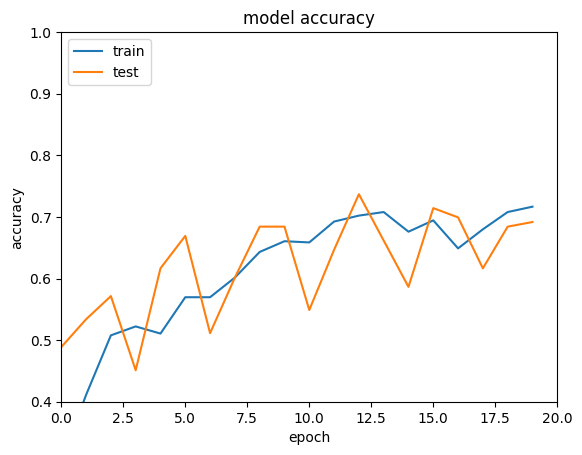

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      brightness_range=[0.8,1.2],
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' # YOUR CODE HERE #
VAL_DIRECTORY_LOCATION = '/tmp/validation' # YOUR CODE HERE #
TARGET_SIZE = (224, 224) # YOUR CODE HERE #
CLASS_MODE = 'categorical' # YOUR CODE HERE #

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)



# Defina o otimizador com uma taxa de aprendizado menor
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Sugestão: taxa de aprendizado menor

model = tf.keras.models.Sequential([
    # Camadas convolucionais
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # Camadas densas com Dropout para regularização
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Sugestão: Dropout após camada densa
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Sugestão: Dropout após camada densa
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile o modelo usando o otimizador com taxa de aprendizado reduzida
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para reduzir a learning rate automaticamente se necessário
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Sugestão: callback para ajuste dinâmico da learning rate

# Exibe o resumo do modelo
model.summary()

LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'Adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()